In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle # making a dirctry

In [3]:
!cp kaggle.json ~/.kaggle #copying file to dirctry, In setting in Kaggle,In API tap create new token , the kaggle.json will be download

In [4]:
!kaggle datasets download -d saumyamohandas/animal-dataset # loading dataset zip by copying API command

Dataset URL: https://www.kaggle.com/datasets/saumyamohandas/animal-dataset
License(s): unknown
100% 62.0M/62.3M [00:04<00:00, 20.8MB/s]
100% 62.3M/62.3M [00:04<00:00, 15.7MB/s]


In [5]:
!unzip /content/animal-dataset.zip  # unzipping the dataset

Archive:  /content/animal-dataset.zip
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Testing/bears/k4 (73).jpeg  
  inflating: dataset/Testing/bears/k4 (73).jpg  
  in

## Data Augmentation - meaning same as preprocessing, various training will do in this.

In [6]:
# import the neccessary lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# data augmentation for the training variable

train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

In [8]:
# data augmentation for the training variable

test_datagen = ImageDataGenerator(rescale=1./255) # rescale is for making same shape and size

In [9]:
# traing data

x_train = train_datagen.flow_from_directory('/content/dataset/Training',
                                              target_size=(64,64),
                                            class_mode='categorical',
                                            batch_size=100)

Found 1238 images belonging to 4 classes.


In [10]:
# testing data
x_test = test_datagen.flow_from_directory('/content/dataset/Testing',
                                              target_size=(64,64),
                                            class_mode='categorical',
                                            batch_size=100)

Found 326 images belonging to 4 classes.


## CNN Model Building

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [14]:
model=Sequential()

In [15]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # convolution Layer
model.add(MaxPooling2D(pool_size=(2,2))) # maxpooling layer
model.add(Flatten()) #flatten layer

model.add(Dense(300,activation='relu')) #hidden layer 1
model.add(Dense(150,activation='relu')) #hidden layer 2

model.add(Dense(4,activation='softmax')) #output layer

In [17]:
# compile the model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) #optimizer is used to speed up

In [18]:
# training the model

model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test)) # epochs means no. of times to run like here we run 10 times


<ipython-input-18-3e2c3f2dcdbd>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test)) # epochs means no. of times to run like here we run 10 times


Epoch 1/10
13/13 [==============================] - 13s 905ms/step - loss: 4.3407 - accuracy: 0.2512 - val_loss: 1.7612 - val_accuracy: 0.2914
Epoch 2/10
13/13 [==============================] - 11s 837ms/step - loss: 1.4313 - accuracy: 0.3069 - val_loss: 1.2306 - val_accuracy: 0.4632
Epoch 3/10
13/13 [==============================] - 10s 769ms/step - loss: 1.1990 - accuracy: 0.4515 - val_loss: 1.1666 - val_accuracy: 0.5429
Epoch 4/10
13/13 [==============================] - 11s 852ms/step - loss: 1.0332 - accuracy: 0.5856 - val_loss: 1.0107 - val_accuracy: 0.5706
Epoch 5/10
13/13 [==============================] - 11s 850ms/step - loss: 0.9486 - accuracy: 0.6171 - val_loss: 0.8662 - val_accuracy: 0.6380
Epoch 6/10
13/13 [==============================] - 11s 844ms/step - loss: 0.8586 - accuracy: 0.6527 - val_loss: 0.6886 - val_accuracy: 0.7669
Epoch 7/10
13/13 [==============================] - 10s 692ms/step - loss: 0.7957 - accuracy: 0.6898 - val_loss: 0.6226 - val_accuracy: 0.7761

In [19]:
# save the model

model.save('animal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## test the model

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np

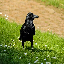

In [23]:
# testing 1

img=image.load_img('/content/dataset/Testing/crows/Z1  (90).jpg',target_size=(64,64))
img

In [24]:
x= image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['bears','crows','elements','rats']
op[pred]

1/1 [==============================] - 0s 26ms/step


'crows'

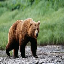

In [25]:
# testing 2

img1=image.load_img('/content/dataset/Testing/bears/k4 (90).jpg',target_size=(64,64))
img1


In [26]:
x= image.img_to_array(img1)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['bears','crows','elements','rats']
op[pred]

1/1 [==============================] - 0s 26ms/step


'bears'